<a href="https://colab.research.google.com/github/brenvilla/Extraccion_de_caracteristicas/blob/main/Act4_Extraccion_Caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 4 (Extracción de Características)**

Brenda Villa Campos A01732238

In [15]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached funpymodeling-0.1.7-py3-none-any.whl (6.4 kB)
  Using cached sklearn-0.0.post4.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Using cached seaborn-0.10.1-py3-none-any.whl (215 kB)
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=8fbf7d15d0a02a24388cb9d5a01b5d9c52b94786e4b8468c33cb3df4dcfbf83d
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [16]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [123]:
#Carga desde un archivo .xlsx sin indice
Micro_Retailer= pd.read_excel('microretailer_mit_lift_lab.xlsx') 

In [124]:
#Verificamos información del DataFrame
Micro_Retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [125]:
#Imprimo los primeros 5 registro del dataframe
Micro_Retailer.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


### **ELIMINACIÓN DE VALORES NULOS DEL DATAFRAME**

In [126]:
#Corroboramos valores nulos
valores_nulos=Micro_Retailer.isnull().sum()
valores_nulos

_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
234_willingness_participate_workshop     73
318_shopkeeper_name                     123
319_shopkeepers_last_name               125
236_whatsapp                            129
235_email                               142
Length: 106, dtype: int64

In [127]:
#Reemplazamos valores nulos del dataframe
Micro_Retailer =Micro_Retailer.fillna(method="bfill")
Micro_Retailer =Micro_Retailer.fillna(method="ffill")
Micro_Retailer=Micro_Retailer.fillna(0)

In [128]:
#Corroboramos valores nulos
valores_nulos=Micro_Retailer.isnull().sum()
valores_nulos

_record_id                              0
_title                                  0
_server_updated_at                      0
_updated_by                             0
_geometry                               0
                                       ..
234_willingness_participate_workshop    0
318_shopkeeper_name                     0
319_shopkeepers_last_name               0
236_whatsapp                            0
235_email                               0
Length: 106, dtype: int64

In [129]:
#Corroboramos valores nulos
valores_nulos_total=Micro_Retailer.isnull().sum().sum()
valores_nulos_total

0

### **PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [130]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=Micro_Retailer

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido _latitude                                            1.913877e+01
_longitude                                          -9.807532e+01
97_number_of_customers_in_store                      5.000000e+00
268_number_fridges                                   5.000000e+00
104_how_many_shelves_does_the_micro_retailer_have    1.600000e+01
2_current_permanent_employees                        5.000000e+00
4_number_permanent_employees_last_year               5.000000e+00
103_number_own_fridges                               5.000000e+00
145_number_direct_competitors                        9.500000e+00
24_burnout                                           1.375000e+01
271_card_fee                                         0.000000e+00
272_card_days_receive_money                          2.500000e+00
273_platform_extra_charge                            0.000000e+00
274_platform_fee                                     0.000000e+00
275_platform_days_receive_money                   

<ipython-input-130-cbe28c28a3ec>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile25=y.quantile(0.25) #Q1
<ipython-input-130-cbe28c28a3ec>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile75=y.quantile(0.75) #Q3


In [131]:
#Encontramos Outliers del Dataframe
outliers_iqr= Micro_Retailer[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

<ipython-input-131-cca19074fa7e>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_iqr= Micro_Retailer[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.212380e+09,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.212380e+09,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.212380e+09,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.212380e+09,NaN


In [132]:
#Obtenemos datos limpios del Dataframe
data_iqr= Micro_Retailer[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_iqr

<ipython-input-132-0917c616116d>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_iqr= Micro_Retailer[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,NaN,NaN,NaN,NaN,NaN,19.053536,-98.233822,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.224524e+09,NaN
1,NaN,NaN,NaN,NaN,NaN,19.053561,-98.234142,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.224524e+09,NaN
2,NaN,NaN,NaN,NaN,NaN,19.058655,-98.232300,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.224524e+09,NaN
3,NaN,NaN,NaN,NaN,NaN,19.059293,-98.233158,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.224524e+09,NaN
4,NaN,NaN,NaN,NaN,NaN,19.059585,-98.233864,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.224524e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,19.043115,-98.194066,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,19.042794,-98.193802,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,19.042809,-98.193439,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,19.042558,-98.193818,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_iqr.isnull().sum()
valores_nulos

_record_id                              171
_title                                  171
_server_updated_at                      171
_updated_by                             171
_geometry                               171
                                       ... 
234_willingness_participate_workshop    171
318_shopkeeper_name                     171
319_shopkeepers_last_name               171
236_whatsapp                             34
235_email                               171
Length: 106, dtype: int64

In [134]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
datos_limpios=data_iqr.copy()
datos_limpios=datos_limpios.fillna(round(data_iqr.mean(),1))
datos_limpios

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,NaN,NaN,NaN,NaN,NaN,19.053536,-98.233822,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.224524e+09,NaN
1,NaN,NaN,NaN,NaN,NaN,19.053561,-98.234142,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.224524e+09,NaN
2,NaN,NaN,NaN,NaN,NaN,19.058655,-98.232300,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.224524e+09,NaN
3,NaN,NaN,NaN,NaN,NaN,19.059293,-98.233158,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.224524e+09,NaN
4,NaN,NaN,NaN,NaN,NaN,19.059585,-98.233864,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.224524e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,19.043115,-98.194066,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.223297e+09,NaN
167,NaN,NaN,NaN,NaN,NaN,19.042794,-98.193802,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.223297e+09,NaN
168,NaN,NaN,NaN,NaN,NaN,19.042809,-98.193439,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.223297e+09,NaN
169,NaN,NaN,NaN,NaN,NaN,19.042558,-98.193818,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.223297e+09,NaN


In [135]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=datos_limpios.isnull().sum()
valores_nulos.head(30)

_record_id                                                    171
_title                                                        171
_server_updated_at                                            171
_updated_by                                                   171
_geometry                                                     171
_latitude                                                       0
_longitude                                                      0
228_store_name                                                171
229_store_picture                                             171
232_type_of_store                                             171
108_does_the_micro_retailer_has_a_barred_window_              171
99_does_the_micro_retailer_exhibits_products_outside_         171
102_does_the_micro_retailer_sells_fresh_products_             171
97_number_of_customers_in_store                                 0
268_number_fridges                                              0
184_store_

In [136]:
# Descargar archivo csv
datos_limpios.to_csv("Micro_Retailer_limpio.csv")
from google.colab import files 
files.download("Micro_Retailer_limpio.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **EXTRACCIÓN DE CARACTERÍSTICAS**

### **Columna "_updated_by"**

In [137]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Micro_Retailer['_updated_by'])
table1

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


In [138]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro1= table1[table1['frequency']>10]
Filtro1

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620


In [139]:
#Ajusto el indice de mi dataframe
Filtro1_index= Filtro1.set_index('_updated_by')
Filtro1_index

,frequency,percentage,cumulative_perc
_updated_by,,,
Salomon Abdala Perez,20,0.116959,0.116959
Ángel Francisco Altamirano Campos,16,0.093567,0.210526
José Zapata,14,0.081871,0.292398
Emilio Garza,13,0.076023,0.368421
Benjamin Barbosa,13,0.076023,0.444444
Pedro Contreras,12,0.070175,0.514620


Text(0, 0.5, 'Frecuencia')

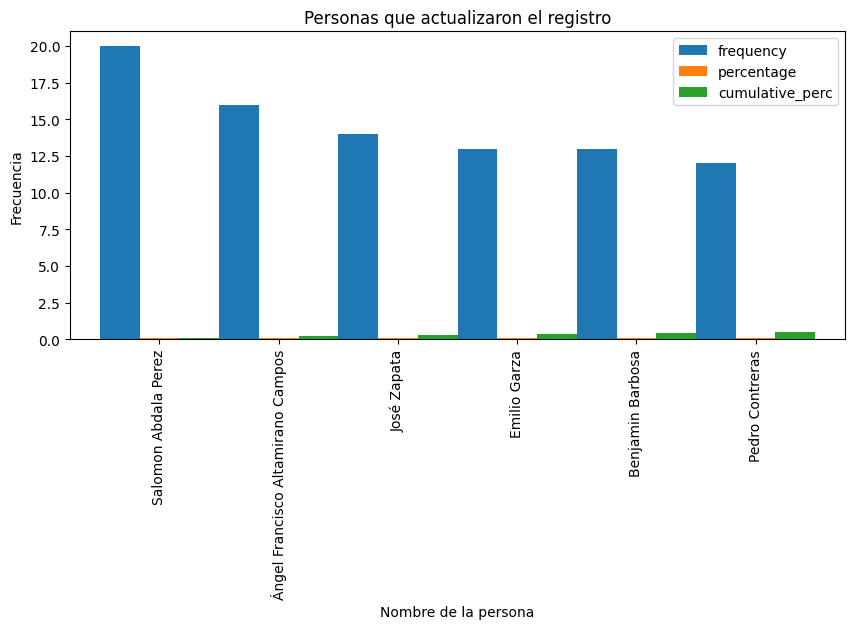

In [140]:
#Realizamos grafico de barras del dataframe filtrado
Filtro1_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Personas que actualizaron el registro')
plt.xlabel('Nombre de la persona')
plt.ylabel('Frecuencia')

### **Columna "232_type_of_store"**

In [212]:
#Obtengo un análisis univariado de una variable categórica en específico
table2= freq_tbl(Micro_Retailer['232_type_of_store'])
table2

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
...,...,...,...,...
59,joyeria,1,0.005848,0.976608
60,dulceria,1,0.005848,0.982456
61,Ropa,1,0.005848,0.988304
62,Ferretería,1,0.005848,0.994152


In [213]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro2= table2[table2['frequency']>=3]
Filtro2

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
5,Produce (fruits & vegetables),4,0.023392,0.637427


In [214]:
#Ajusto el indice de mi dataframe
Filtro2_index= Filtro2.set_index('232_type_of_store')
Filtro2_index

,frequency,percentage,cumulative_perc
232_type_of_store,,,
Grocery store (aka. nanostore),52,0.304094,0.304094
Micro-restaurant (aka. fondita),31,0.181287,0.485380
Dairy products,10,0.058480,0.543860
Cafeteria,6,0.035088,0.578947
Butcher shop,6,0.035088,0.614035
Produce (fruits & vegetables),4,0.023392,0.637427


<Axes: ylabel='frequency'>

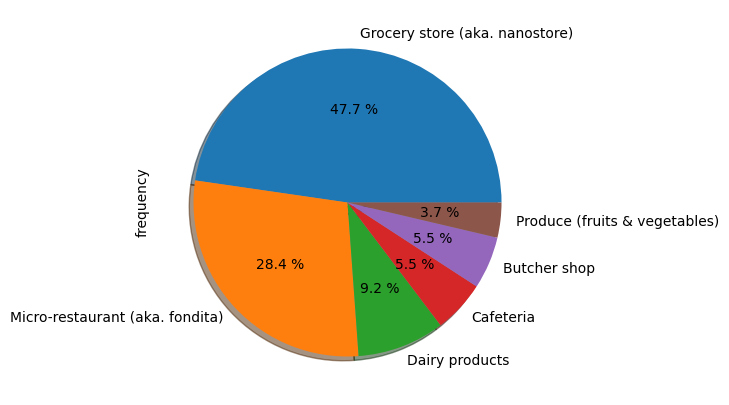

In [215]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro2_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

### **Columna "102_does_the_micro_retailer_sells_fresh_products_"**

In [145]:
#Obtengo un análisis univariado de una variable categórica en específico
table3= freq_tbl(Micro_Retailer['102_does_the_micro_retailer_sells_fresh_products_'])
table3

,102_does_the_micro_retailer_sells_fresh_products_,frequency,percentage,cumulative_perc
0,no,105,0.614035,0.614035
1,yes,66,0.385965,1.000000


In [146]:
#Ajusto el indice de mi dataframe
Filtro3_index= table3.set_index('102_does_the_micro_retailer_sells_fresh_products_')
Filtro3_index

,frequency,percentage,cumulative_perc
102_does_the_micro_retailer_sells_fresh_products_,,,
no,105,0.614035,0.614035
yes,66,0.385965,1.000000


Text(0.5, 1.0, '¿La micro minorista vende productos frescos?')

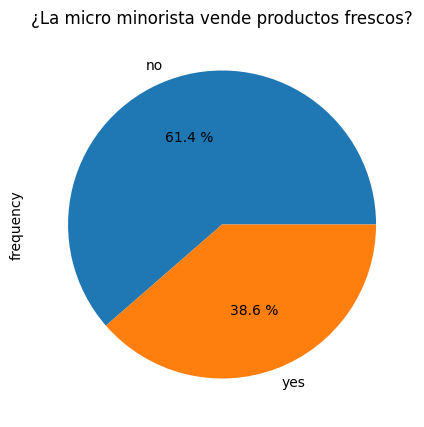

In [147]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro3_index["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
plt.title('¿La micro minorista vende productos frescos?')

### **Columna "184_store_devices"**

In [148]:
#Obtengo un análisis univariado de una variable categórica en específico
table4= freq_tbl(Micro_Retailer['184_store_devices'])
table4

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,52,0.304094,0.304094
1,Analog cash register,16,0.093567,0.397661
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.450292
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.502924
4,"Analog cash register,Smartphone",8,0.046784,0.549708
5,"Security cameras,Smartphone",7,0.040936,0.590643
6,"Dataphone (i.e. card payments),Security camera...",5,0.029240,0.619883
7,Security cameras,5,0.029240,0.649123
8,POS system (i.e. computer + bar code scanner +...,4,0.023392,0.672515
9,"Analog cash register,Security cameras",4,0.023392,0.695906


In [149]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro4= table4[table4['frequency']>5]
Filtro4

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,52,0.304094,0.304094
1,Analog cash register,16,0.093567,0.397661
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.450292
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.502924
4,"Analog cash register,Smartphone",8,0.046784,0.549708
5,"Security cameras,Smartphone",7,0.040936,0.590643


In [150]:
#Ajusto el indice de mi dataframe
Filtro4_index= Filtro4.set_index('184_store_devices')
Filtro4_index

,frequency,percentage,cumulative_perc
184_store_devices,,,
Smartphone,52,0.304094,0.304094
Analog cash register,16,0.093567,0.397661
POS system (i.e. computer + bar code scanner + printer),9,0.052632,0.450292
"POS system (i.e. computer + bar code scanner + printer),Smartphone",9,0.052632,0.502924
"Analog cash register,Smartphone",8,0.046784,0.549708
"Security cameras,Smartphone",7,0.040936,0.590643


Text(0, 0.5, 'Frecuencia')

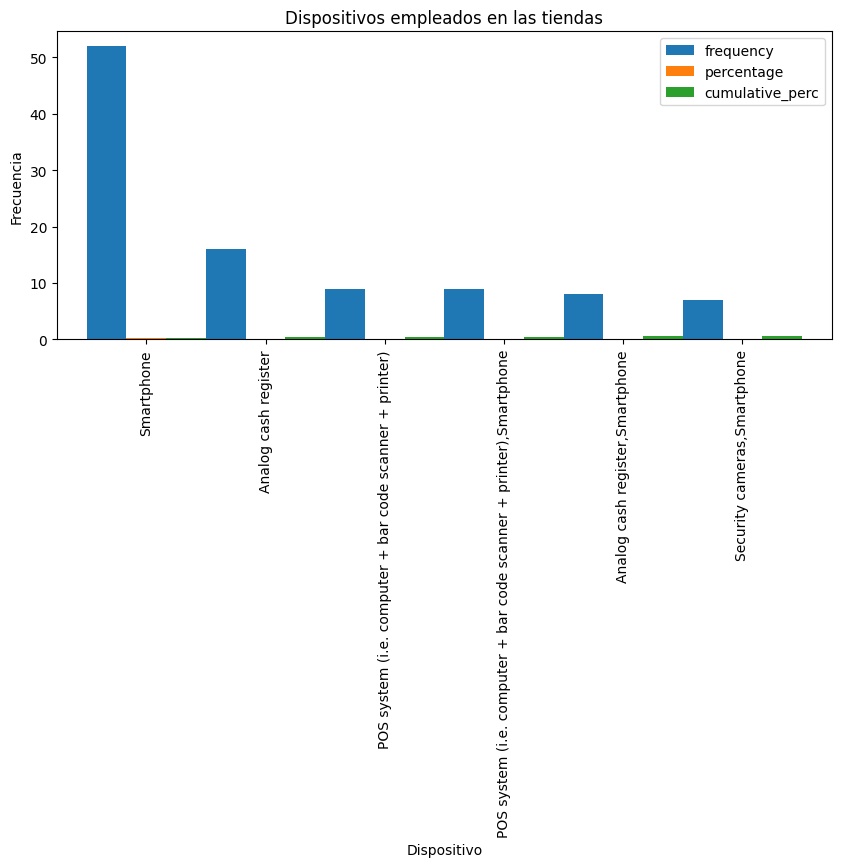

In [151]:
#Realizamos grafico de barras del dataframe filtrado
Filtro4_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Dispositivos empleados en las tiendas')
plt.xlabel('Dispositivo')
plt.ylabel('Frecuencia')

### **Columna "5_change_store_space_last_year"**

In [152]:
#Obtengo un análisis univariado de una variable categórica en específico
table5= freq_tbl(Micro_Retailer['5_change_store_space_last_year'])
table5

,5_change_store_space_last_year,frequency,percentage,cumulative_perc
0,No cambió,122,0.713450,0.713450
1,Aumentó 25%,16,0.093567,0.807018
2,Disminuyó 15%,15,0.087719,0.894737
3,Aumentó 50% o más,9,0.052632,0.947368
4,Aumentó 15%,4,0.023392,0.970760
5,Disminuyó 50% o más,3,0.017544,0.988304
6,Disminuyó 25%,2,0.011696,1.000000


In [153]:
#Ajusto el indice de mi dataframe
Filtro5_index= table5.set_index('5_change_store_space_last_year')
Filtro5_index

,frequency,percentage,cumulative_perc
5_change_store_space_last_year,,,
No cambió,122,0.713450,0.713450
Aumentó 25%,16,0.093567,0.807018
Disminuyó 15%,15,0.087719,0.894737
Aumentó 50% o más,9,0.052632,0.947368
Aumentó 15%,4,0.023392,0.970760
Disminuyó 50% o más,3,0.017544,0.988304
Disminuyó 25%,2,0.011696,1.000000


<Axes: ylabel='frequency'>

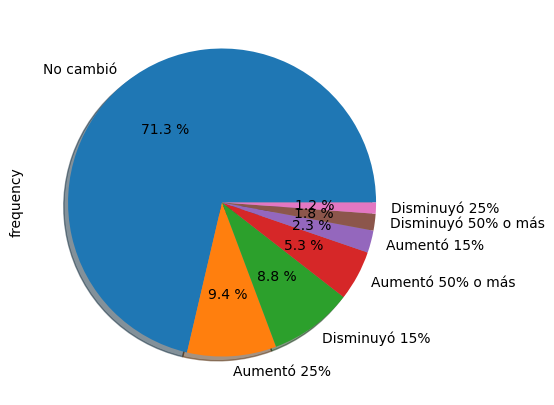

In [154]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro5_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

### **Columna "49_inventory_records"**

In [155]:
#Obtengo un análisis univariado de una variable categórica en específico
table6= freq_tbl(Micro_Retailer['49_inventory_records'])
table6

,49_inventory_records,frequency,percentage,cumulative_perc
0,En papel,65,0.380117,0.380117
1,En Excel,31,0.181287,0.561404
2,Software especializado + computadora,29,0.169591,0.730994
3,No lo hago,24,0.140351,0.871345
4,"En Excel,En papel",17,0.099415,0.970760
5,Aplicación móvil (i.e. App) + smartphone,2,0.011696,0.982456
6,Mentalmente,1,0.005848,0.988304
7,"En papel,Mental",1,0.005848,0.994152
8,"Aplicación móvil (i.e. App) + smartphone,En Excel",1,0.005848,1.000000


In [156]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro6= table6[table6['frequency']>10]
Filtro6

,49_inventory_records,frequency,percentage,cumulative_perc
0,En papel,65,0.380117,0.380117
1,En Excel,31,0.181287,0.561404
2,Software especializado + computadora,29,0.169591,0.730994
3,No lo hago,24,0.140351,0.871345
4,"En Excel,En papel",17,0.099415,0.970760


In [157]:
#Ajusto el indice de mi dataframe
Filtro6_index= Filtro6.set_index('49_inventory_records')
Filtro6_index

,frequency,percentage,cumulative_perc
49_inventory_records,,,
En papel,65,0.380117,0.380117
En Excel,31,0.181287,0.561404
Software especializado + computadora,29,0.169591,0.730994
No lo hago,24,0.140351,0.871345
"En Excel,En papel",17,0.099415,0.970760


Text(0.5, 1.0, 'Modo de registro de inventario')

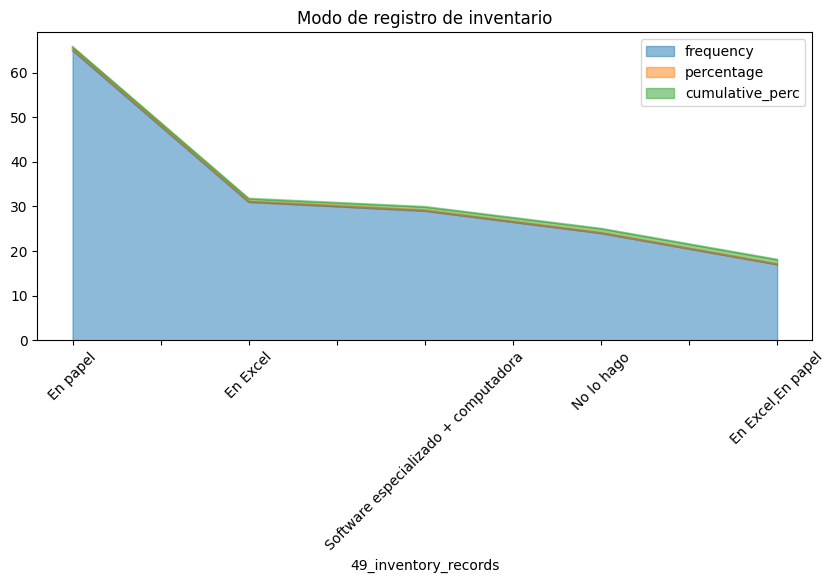

In [158]:
#Realizamos grafico de área del dataframe filtrado
Filtro6_index.plot(kind='area', figsize=(10,4),alpha = 0.5)
plt.xticks(rotation=45)
plt.title('Modo de registro de inventario')

### **Columna "210_sales_channels"**

In [159]:
#Obtengo un análisis univariado de una variable categórica en específico
table7= freq_tbl(Micro_Retailer['210_sales_channels'])
table7

,210_sales_channels,frequency,percentage,cumulative_perc
0,"Redes sociales (e.g. Facebook, Instagram),What...",26,0.152047,0.152047
1,WhatsApp,22,0.128655,0.280702
2,"Redes sociales (e.g. Facebook, Instagram)",20,0.116959,0.397661
3,Llamada a Teléfono fijo,12,0.070175,0.467836
4,conocidos paquetes cerrados,10,0.058480,0.526316
5,"Llamada a Teléfono celular,WhatsApp",8,0.046784,0.573099
6,Llamada a Teléfono celular,7,0.040936,0.614035
7,"Página web propia,WhatsApp",7,0.040936,0.654971
8,"Llamada a Teléfono celular,Redes sociales (e.g...",7,0.040936,0.695906
9,"Página web propia,Redes sociales (e.g. Faceboo...",7,0.040936,0.736842


In [160]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro7= table7[table7['frequency']>10]
Filtro7

,210_sales_channels,frequency,percentage,cumulative_perc
0,"Redes sociales (e.g. Facebook, Instagram),What...",26,0.152047,0.152047
1,WhatsApp,22,0.128655,0.280702
2,"Redes sociales (e.g. Facebook, Instagram)",20,0.116959,0.397661
3,Llamada a Teléfono fijo,12,0.070175,0.467836


In [161]:
#Ajusto el indice de mi dataframe
Filtro7_index= Filtro7.set_index('210_sales_channels')
Filtro7_index

,frequency,percentage,cumulative_perc
210_sales_channels,,,
"Redes sociales (e.g. Facebook, Instagram),WhatsApp",26,0.152047,0.152047
WhatsApp,22,0.128655,0.280702
"Redes sociales (e.g. Facebook, Instagram)",20,0.116959,0.397661
Llamada a Teléfono fijo,12,0.070175,0.467836


Text(0.5, 1.0, 'Canales de venta')

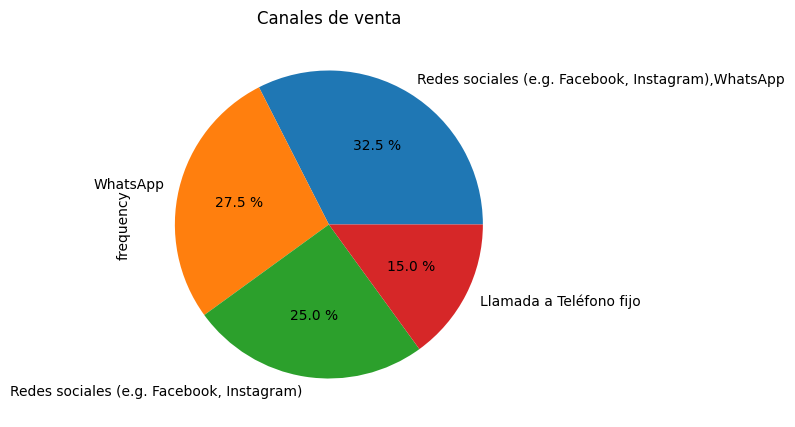

In [162]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro7_index["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
plt.title('Canales de venta')

### **Columna "189_payment_methods"**

In [163]:
#Obtengo un análisis univariado de una variable categórica en específico
table8= freq_tbl(Micro_Retailer['189_payment_methods'])
table8

,189_payment_methods,frequency,percentage,cumulative_perc
0,Efectivo,64,0.374269,0.374269
1,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",49,0.286550,0.660819
2,"Efectivo,Tarjeta de débito y/o crédito",35,0.204678,0.865497
3,"Efectivo,Transferencia interbancaria",20,0.116959,0.982456
4,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.988304
5,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.994152
6,Tarjeta de débito y/o crédito,1,0.005848,1.000000


In [164]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro8= table8[table8['frequency']>1]
Filtro8

,189_payment_methods,frequency,percentage,cumulative_perc
0,Efectivo,64,0.374269,0.374269
1,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",49,0.286550,0.660819
2,"Efectivo,Tarjeta de débito y/o crédito",35,0.204678,0.865497
3,"Efectivo,Transferencia interbancaria",20,0.116959,0.982456


In [165]:
#Ajusto el indice de mi dataframe
Filtro8_index= Filtro8.set_index('189_payment_methods')
Filtro8_index

,frequency,percentage,cumulative_perc
189_payment_methods,,,
Efectivo,64,0.374269,0.374269
"Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",49,0.286550,0.660819
"Efectivo,Tarjeta de débito y/o crédito",35,0.204678,0.865497
"Efectivo,Transferencia interbancaria",20,0.116959,0.982456


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Efectivo'),
  Text(1, 0, 'Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria'),
  Text(2, 0, 'Efectivo,Tarjeta de débito y/o crédito'),
  Text(3, 0, 'Efectivo,Transferencia interbancaria')])

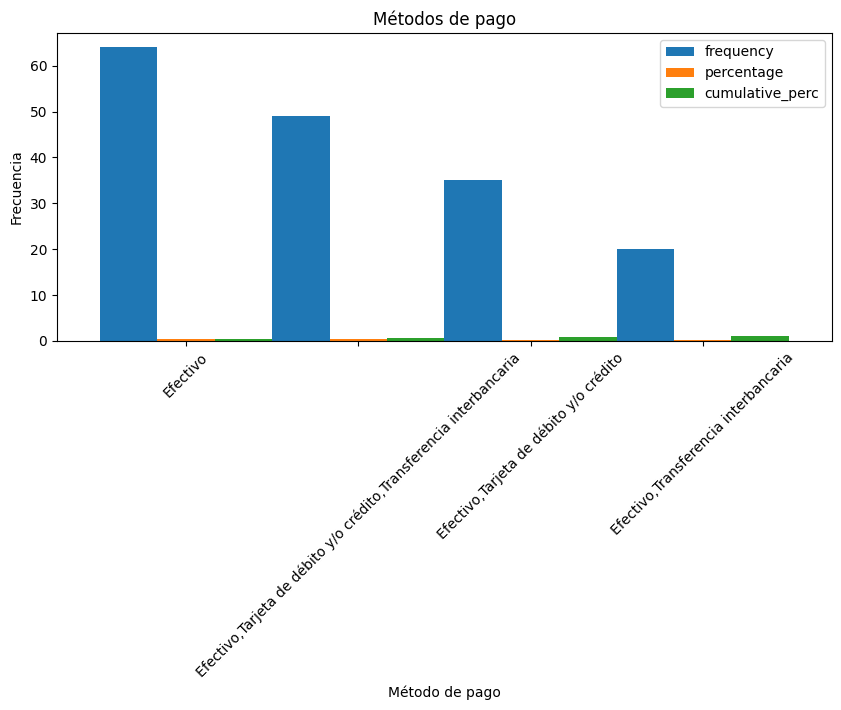

In [166]:
#Realizamos grafico de barras del dataframe filtrado
Filtro8_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Métodos de pago')
plt.xlabel('Método de pago')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

### **Columna "214_customer_relationship_tools"**

In [167]:
#Obtengo un análisis univariado de una variable categórica en específico
table9= freq_tbl(Micro_Retailer['214_customer_relationship_tools'])
table9

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Redes sociales,57,0.333333,0.333333
1,Ninguna,44,0.257310,0.590643
2,Aplicación móvil,31,0.181287,0.771930
3,"Aplicación móvil,Redes sociales",22,0.128655,0.900585
4,Cuaderno,9,0.052632,0.953216
5,Teléfono,1,0.005848,0.959064
6,"Cuaderno,Redes sociales",1,0.005848,0.964912
7,"Aplicación móvil,De frente",1,0.005848,0.970760
8,Físico,1,0.005848,0.976608
9,"Aplicación móvil,Ninguna",1,0.005848,0.982456


In [168]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro9= table9[table9['frequency']>10]
Filtro9

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Redes sociales,57,0.333333,0.333333
1,Ninguna,44,0.257310,0.590643
2,Aplicación móvil,31,0.181287,0.771930
3,"Aplicación móvil,Redes sociales",22,0.128655,0.900585


In [169]:
#Ajusto el indice de mi dataframe
Filtro9_index= Filtro9.set_index('214_customer_relationship_tools')
Filtro9_index

,frequency,percentage,cumulative_perc
214_customer_relationship_tools,,,
Redes sociales,57,0.333333,0.333333
Ninguna,44,0.257310,0.590643
Aplicación móvil,31,0.181287,0.771930
"Aplicación móvil,Redes sociales",22,0.128655,0.900585


<Axes: xlabel='214_customer_relationship_tools'>

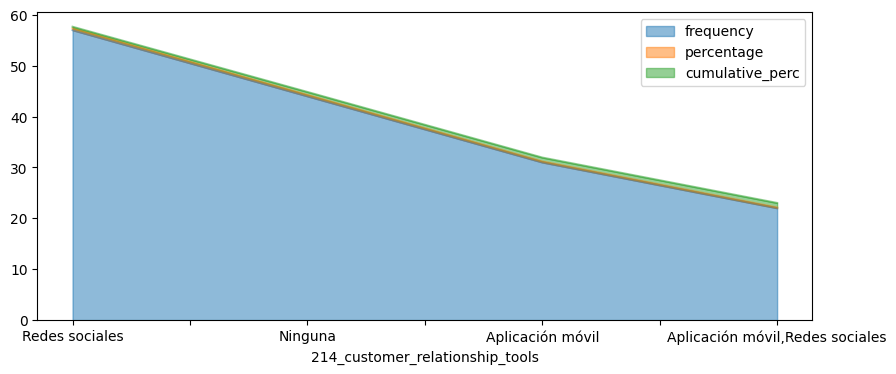

In [170]:
#Realizamos grafico de área del dataframe filtrado
Filtro9_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

### **Columna "33_credit_to_customers"**

In [171]:
#Obtengo un análisis univariado de una variable categórica en específico
table10= freq_tbl(Micro_Retailer['33_credit_to_customers'])
table10

,33_credit_to_customers,frequency,percentage,cumulative_perc
0,no,135,0.789474,0.789474
1,yes,36,0.210526,1.000000


In [172]:
#Ajusto el indice de mi dataframe
Filtro10_index= table10.set_index('33_credit_to_customers')
Filtro10_index

,frequency,percentage,cumulative_perc
33_credit_to_customers,,,
no,135,0.789474,0.789474
yes,36,0.210526,1.000000


Text(0.5, 1.0, 'Otorgamiento de crédito a clientes')

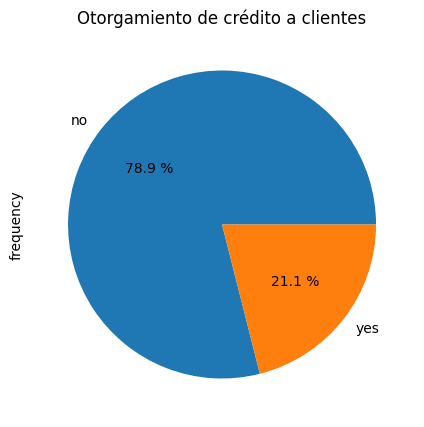

In [173]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro10_index["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
plt.title('Otorgamiento de crédito a clientes')

### **Columna "60_services"**

In [174]:
#Obtengo un análisis univariado de una variable categórica en específico
table11= freq_tbl(Micro_Retailer['60_services'])
table11

,60_services,frequency,percentage,cumulative_perc
0,Ninguno,106,0.619883,0.619883
1,Recarga telefónica,18,0.105263,0.725146
2,Entrega a domicilio,17,0.099415,0.824561
3,"Entrega a domicilio,Pago de servicios públicos...",9,0.052632,0.877193
4,"Recepción y entrega de paquetes (e.g. Amazon, ...",8,0.046784,0.923977
5,"Pago de servicios públicos (e.g. Yastas),Recar...",5,0.029240,0.953216
6,"Entrega a domicilio,Pago de servicios públicos...",2,0.011696,0.964912
7,"Entrega a domicilio,Recarga telefónica",2,0.011696,0.976608
8,Toma de papa nicolau,1,0.005848,0.982456
9,Renta de local,1,0.005848,0.988304


In [175]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro11 = table11[table11['frequency']>5]
Filtro11

,60_services,frequency,percentage,cumulative_perc
0,Ninguno,106,0.619883,0.619883
1,Recarga telefónica,18,0.105263,0.725146
2,Entrega a domicilio,17,0.099415,0.824561
3,"Entrega a domicilio,Pago de servicios públicos...",9,0.052632,0.877193
4,"Recepción y entrega de paquetes (e.g. Amazon, ...",8,0.046784,0.923977


In [176]:
#Ajusto el indice de mi dataframe
Filtro11_index= Filtro11.set_index('60_services')
Filtro11_index

,frequency,percentage,cumulative_perc
60_services,,,
Ninguno,106,0.619883,0.619883
Recarga telefónica,18,0.105263,0.725146
Entrega a domicilio,17,0.099415,0.824561
"Entrega a domicilio,Pago de servicios públicos (e.g. Yastas),Recarga telefónica,Recepción y entrega de paquetes (e.g. Amazon, Mercado Libre)",9,0.052632,0.877193
"Recepción y entrega de paquetes (e.g. Amazon, Mercado Libre)",8,0.046784,0.923977


Text(0.5, 1.0, 'Servicios que ofrecen')

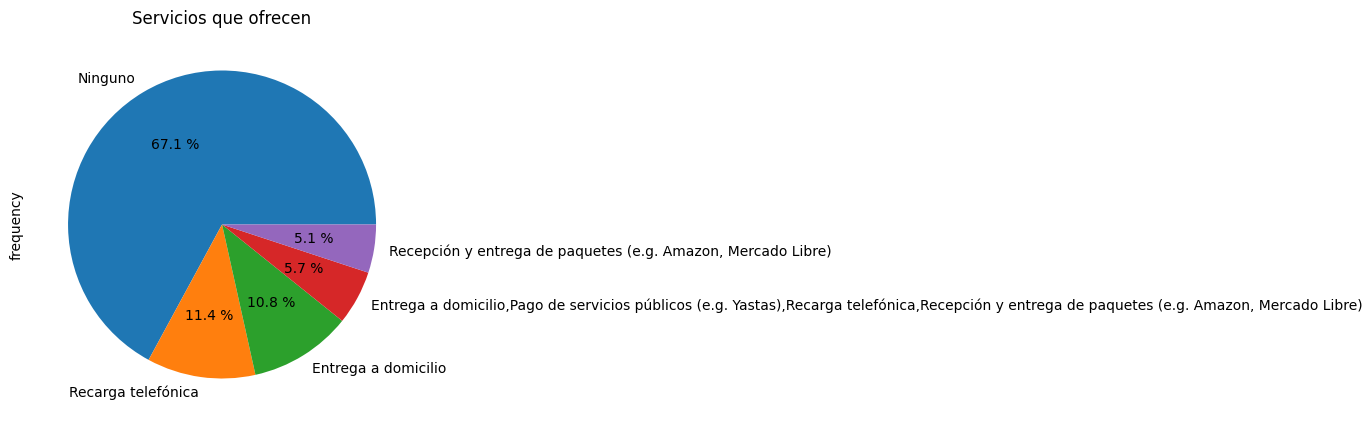

In [177]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro11_index["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
plt.title('Servicios que ofrecen')

### **Columna "69_why_not_services"**

In [178]:
#Obtengo un análisis univariado de una variable categórica en específico
table12= freq_tbl(Micro_Retailer['69_why_not_services'])
table12

,69_why_not_services,frequency,percentage,cumulative_perc
0,No conozco los servicios,53,0.309942,0.309942
1,Es muy caro,18,0.105263,0.415205
2,Se quiere involucrar,15,0.087719,0.502924
3,No quiero involucrarme con la tecnología,14,0.081871,0.584795
4,No son funcionales para mi empresa,14,0.081871,0.666667
5,"Es muy caro,No quiero involucrarme con la tecn...",13,0.076023,0.742690
6,No creo que represente grandes ingresos,10,0.058480,0.801170
7,no es requerido,7,0.040936,0.842105
8,no lo vale,6,0.035088,0.877193
9,"No conozco los servicios,No quiero involucrarm...",5,0.029240,0.906433


In [179]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro12 = table12[table12['frequency']>10]
Filtro12

,69_why_not_services,frequency,percentage,cumulative_perc
0,No conozco los servicios,53,0.309942,0.309942
1,Es muy caro,18,0.105263,0.415205
2,Se quiere involucrar,15,0.087719,0.502924
3,No quiero involucrarme con la tecnología,14,0.081871,0.584795
4,No son funcionales para mi empresa,14,0.081871,0.666667
5,"Es muy caro,No quiero involucrarme con la tecn...",13,0.076023,0.742690


In [180]:
#Ajusto el indice de mi dataframe
Filtro12_index= Filtro12.set_index('69_why_not_services')
Filtro12_index

,frequency,percentage,cumulative_perc
69_why_not_services,,,
No conozco los servicios,53,0.309942,0.309942
Es muy caro,18,0.105263,0.415205
Se quiere involucrar,15,0.087719,0.502924
No quiero involucrarme con la tecnología,14,0.081871,0.584795
No son funcionales para mi empresa,14,0.081871,0.666667
"Es muy caro,No quiero involucrarme con la tecnología",13,0.076023,0.742690


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'No conozco los servicios'),
  Text(1, 0, 'Es muy caro'),
  Text(2, 0, 'Se quiere involucrar'),
  Text(3, 0, 'No quiero involucrarme con la tecnología'),
  Text(4, 0, 'No son funcionales para mi empresa'),
  Text(5, 0, 'Es muy caro,No quiero involucrarme con la tecnología')])

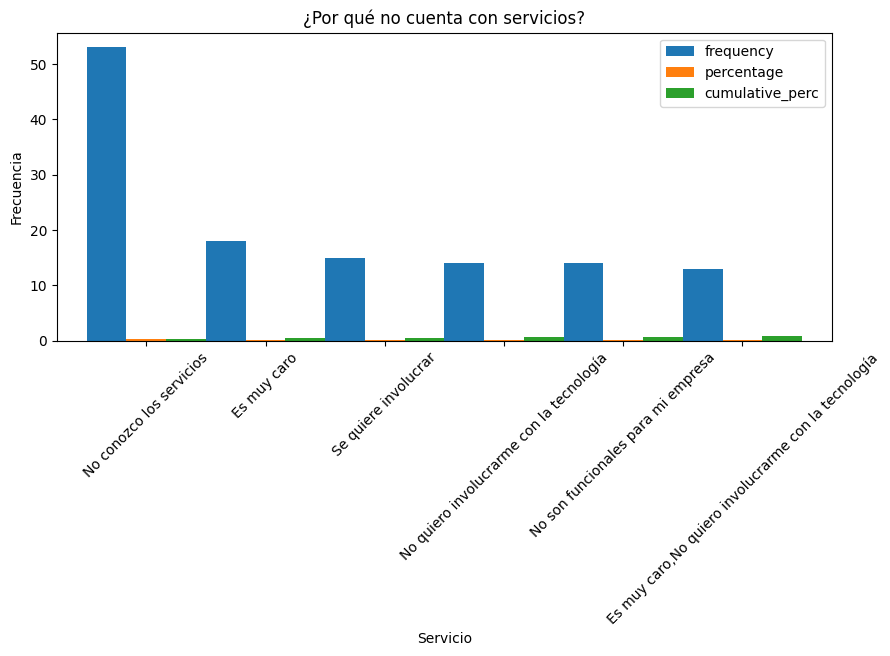

In [181]:
#Realizamos grafico de barras del dataframe filtrado
Filtro12_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('¿Por qué no cuenta con servicios?')
plt.xlabel('Servicio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

### **Columna "313_home_deliveries"**

In [182]:
#Obtengo un análisis univariado de una variable categórica en específico
table13= freq_tbl(Micro_Retailer['313_home_deliveries'])
table13

,313_home_deliveries,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,73,0.426901,0.426901
1,Algo de acuerdo,41,0.239766,0.666667
2,Totalmente de acuerdo,34,0.198830,0.865497
3,Algo en desacuerdo,13,0.076023,0.941520
4,Ni de acuerdo ni en desacuerdo,10,0.058480,1.000000


In [183]:
#Ajusto el indice de mi dataframe
Filtro13_index= table13.set_index('313_home_deliveries')
Filtro13_index

,frequency,percentage,cumulative_perc
313_home_deliveries,,,
Totalmente en desacuerdo,73,0.426901,0.426901
Algo de acuerdo,41,0.239766,0.666667
Totalmente de acuerdo,34,0.198830,0.865497
Algo en desacuerdo,13,0.076023,0.941520
Ni de acuerdo ni en desacuerdo,10,0.058480,1.000000


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Totalmente en desacuerdo'),
  Text(1, 0, 'Algo de acuerdo'),
  Text(2, 0, 'Totalmente de acuerdo'),
  Text(3, 0, 'Algo en desacuerdo'),
  Text(4, 0, 'Ni de acuerdo ni en desacuerdo')])

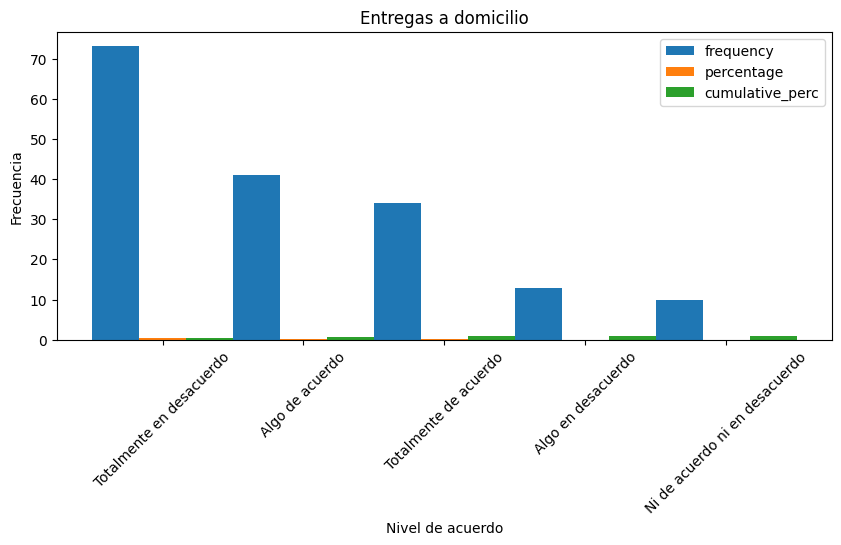

In [184]:
#Realizamos grafico de barras del dataframe filtrado
Filtro13_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Entregas a domicilio')
plt.xlabel('Nivel de acuerdo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

### **Columna "185_place_orders_suppliers"**

In [185]:
#Obtengo un análisis univariado de una variable categórica en específico
table14= freq_tbl(Micro_Retailer['185_place_orders_suppliers'])
table14

,185_place_orders_suppliers,frequency,percentage,cumulative_perc
0,En persona,39,0.228070,0.228070
1,Mensajería instantánea (e.g. WhatsApp),30,0.175439,0.403509
2,"En persona,Llamada telefónica",13,0.076023,0.479532
3,"Llamada telefónica,Mensajería instantánea (e.g...",12,0.070175,0.549708
4,Sistema especializado del proveedor (e.g. VMS),12,0.070175,0.619883
5,Página web del proveedor,11,0.064327,0.684211
6,Llamada telefónica,10,0.058480,0.742690
7,"En persona,Llamada telefónica,Mensajería insta...",10,0.058480,0.801170
8,"En persona,Mensajería instantánea (e.g. WhatsApp)",9,0.052632,0.853801
9,"Mensaje de texto (SMS),Mensajería instantánea ...",9,0.052632,0.906433


In [186]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro14 = table14[table14['frequency']>10]
Filtro14

,185_place_orders_suppliers,frequency,percentage,cumulative_perc
0,En persona,39,0.228070,0.228070
1,Mensajería instantánea (e.g. WhatsApp),30,0.175439,0.403509
2,"En persona,Llamada telefónica",13,0.076023,0.479532
3,"Llamada telefónica,Mensajería instantánea (e.g...",12,0.070175,0.549708
4,Sistema especializado del proveedor (e.g. VMS),12,0.070175,0.619883
5,Página web del proveedor,11,0.064327,0.684211


In [187]:
#Ajusto el indice de mi dataframe
Filtro14_index= Filtro14.set_index('185_place_orders_suppliers')
Filtro14_index

,frequency,percentage,cumulative_perc
185_place_orders_suppliers,,,
En persona,39,0.228070,0.228070
Mensajería instantánea (e.g. WhatsApp),30,0.175439,0.403509
"En persona,Llamada telefónica",13,0.076023,0.479532
"Llamada telefónica,Mensajería instantánea (e.g. WhatsApp)",12,0.070175,0.549708
Sistema especializado del proveedor (e.g. VMS),12,0.070175,0.619883
Página web del proveedor,11,0.064327,0.684211


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, 'Página web del proveedor'),
  Text(0.0, 0, 'En persona'),
  Text(1.0, 0, 'Mensajería instantánea (e.g. WhatsApp)'),
  Text(2.0, 0, 'En persona,Llamada telefónica'),
  Text(3.0, 0, 'Llamada telefónica,Mensajería instantánea (e.g. WhatsApp)'),
  Text(4.0, 0, 'Sistema especializado del proveedor (e.g. VMS)'),
  Text(5.0, 0, 'Página web del proveedor'),
  Text(6.0, 0, '')])

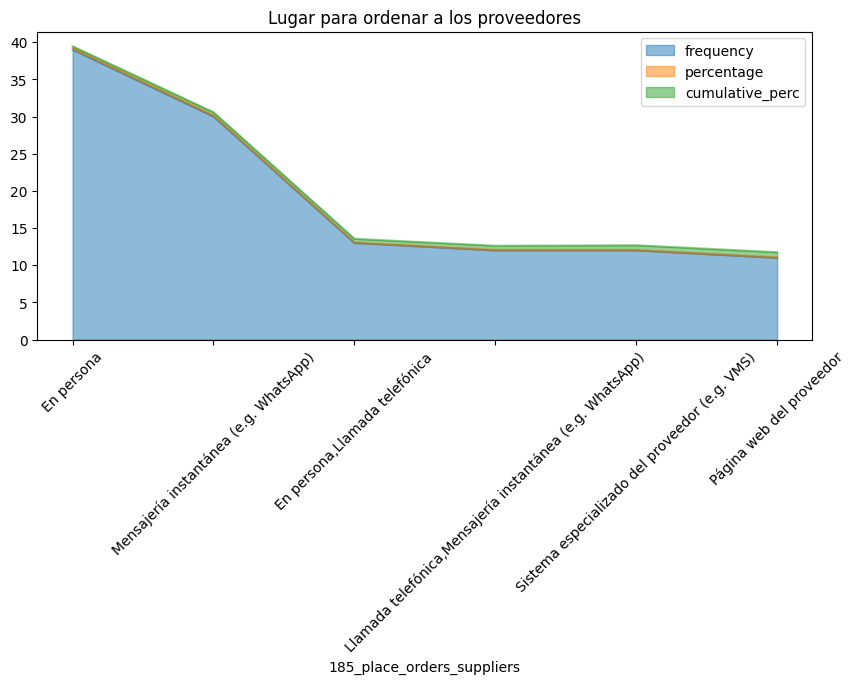

In [188]:
#Realizamos grafico de área del dataframe filtrado
Filtro14_index.plot(kind='area', figsize=(10,4),alpha = 0.5)
plt.title('Lugar para ordenar a los proveedores')
plt.xticks(rotation=45)

### **Columna "53_special_conditions_suppliers"**

In [189]:
#Obtengo un análisis univariado de una variable categórica en específico
table15= freq_tbl(Micro_Retailer['53_special_conditions_suppliers'])
table15

,53_special_conditions_suppliers,frequency,percentage,cumulative_perc
0,Crédito,49,0.286550,0.286550
1,Ninguno,33,0.192982,0.479532
2,Descuento por compras anticipadas,31,0.181287,0.660819
3,Promociones,12,0.070175,0.730994
4,No,9,0.052632,0.783626
5,"Crédito,Descuento por compras anticipadas",8,0.046784,0.830409
6,"Consignación,Crédito,Descuento por compras ant...",8,0.046784,0.877193
7,ninguno,3,0.017544,0.894737
8,Recompra,3,0.017544,0.912281
9,Consignación,3,0.017544,0.929825


In [190]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro15 = table15[table15['frequency']>10]
Filtro15

,53_special_conditions_suppliers,frequency,percentage,cumulative_perc
0,Crédito,49,0.286550,0.286550
1,Ninguno,33,0.192982,0.479532
2,Descuento por compras anticipadas,31,0.181287,0.660819
3,Promociones,12,0.070175,0.730994


In [191]:
#Ajusto el indice de mi dataframe
Filtro15_index= Filtro15.set_index('53_special_conditions_suppliers')
Filtro15_index

,frequency,percentage,cumulative_perc
53_special_conditions_suppliers,,,
Crédito,49,0.286550,0.286550
Ninguno,33,0.192982,0.479532
Descuento por compras anticipadas,31,0.181287,0.660819
Promociones,12,0.070175,0.730994


Text(0.5, 1.0, 'Condiciones especiales para proveedores')

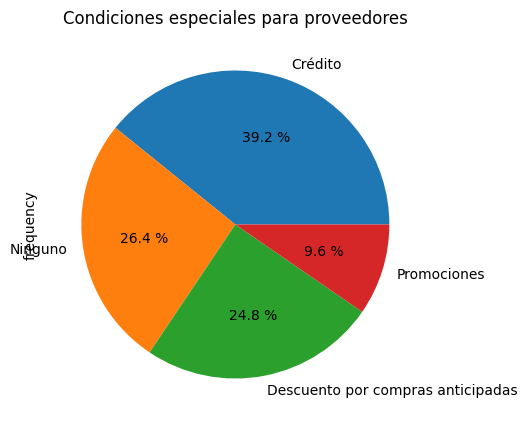

In [192]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro15_index["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
plt.title('Condiciones especiales para proveedores')

### **Columna "277_payment_method_suppliers"**

In [193]:
#Obtengo un análisis univariado de una variable categórica en específico
table16= freq_tbl(Micro_Retailer['277_payment_method_suppliers'])
table16

,277_payment_method_suppliers,frequency,percentage,cumulative_perc
0,Efectivo,113,0.660819,0.660819
1,Tarjeta de débito y/o crédito,19,0.111111,0.771930
2,Transferencia interbancaria,13,0.076023,0.847953
3,"Efectivo,Tarjeta de débito y/o crédito",13,0.076023,0.923977
4,"Efectivo,Transferencia interbancaria",10,0.058480,0.982456
5,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",3,0.017544,1.000000


In [194]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro16 = table16[table16['frequency']>10]
Filtro16

,277_payment_method_suppliers,frequency,percentage,cumulative_perc
0,Efectivo,113,0.660819,0.660819
1,Tarjeta de débito y/o crédito,19,0.111111,0.771930
2,Transferencia interbancaria,13,0.076023,0.847953
3,"Efectivo,Tarjeta de débito y/o crédito",13,0.076023,0.923977


In [195]:
#Ajusto el indice de mi dataframe
Filtro16_index= Filtro16.set_index('277_payment_method_suppliers')
Filtro16_index

,frequency,percentage,cumulative_perc
277_payment_method_suppliers,,,
Efectivo,113,0.660819,0.660819
Tarjeta de débito y/o crédito,19,0.111111,0.771930
Transferencia interbancaria,13,0.076023,0.847953
"Efectivo,Tarjeta de débito y/o crédito",13,0.076023,0.923977


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Efectivo'),
  Text(1, 0, 'Tarjeta de débito y/o crédito'),
  Text(2, 0, 'Transferencia interbancaria'),
  Text(3, 0, 'Efectivo,Tarjeta de débito y/o crédito')])

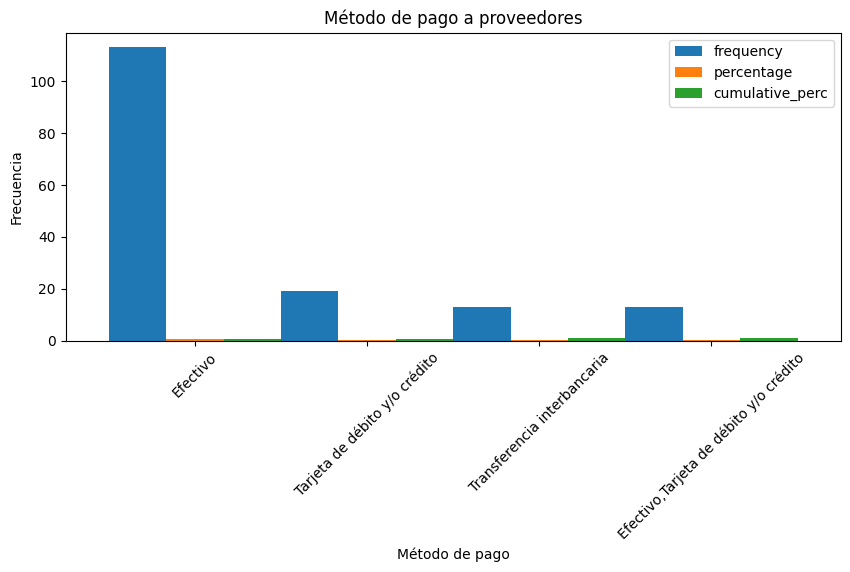

In [196]:
#Realizamos grafico de barras del dataframe filtrado
Filtro16_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Método de pago a proveedores')
plt.xlabel('Método de pago')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

### **Columna "157_frequency_organize_shelves"**

In [197]:
#Obtengo un análisis univariado de una variable categórica en específico
table17= freq_tbl(Micro_Retailer['157_frequency_organize_shelves'])
table17

,157_frequency_organize_shelves,frequency,percentage,cumulative_perc
0,Semanalmente,73,0.426901,0.426901
1,Diariamente,46,0.269006,0.695906
2,Mensualmente,22,0.128655,0.824561
3,Nunca,16,0.093567,0.918129
4,Quincenalmente,10,0.058480,0.976608
5,Anualmente,2,0.011696,0.988304
6,Semestralmente,1,0.005848,0.994152
7,No se tiene,1,0.005848,1.000000


In [198]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro17 = table17[table17['frequency']>10]
Filtro17

,157_frequency_organize_shelves,frequency,percentage,cumulative_perc
0,Semanalmente,73,0.426901,0.426901
1,Diariamente,46,0.269006,0.695906
2,Mensualmente,22,0.128655,0.824561
3,Nunca,16,0.093567,0.918129


In [199]:
#Ajusto el indice de mi dataframe
Filtro17_index= Filtro17.set_index('157_frequency_organize_shelves')
Filtro17_index

,frequency,percentage,cumulative_perc
157_frequency_organize_shelves,,,
Semanalmente,73,0.426901,0.426901
Diariamente,46,0.269006,0.695906
Mensualmente,22,0.128655,0.824561
Nunca,16,0.093567,0.918129


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

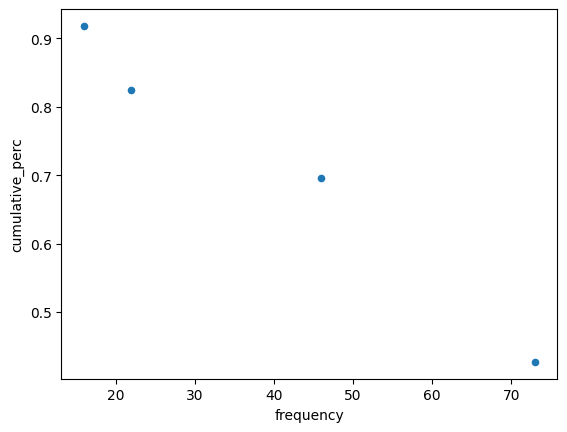

In [200]:
#Realizamos grafico de dispersión del dataframe filtrado
Filtro17_index.plot("frequency", "cumulative_perc", kind="scatter")

### **Columna "158_charact_organize_products_on_shelves"**

In [201]:
#Obtengo un análisis univariado de una variable categórica en específico
table18= freq_tbl(Micro_Retailer['158_charact_organize_products_on_shelves'])
table18

,158_charact_organize_products_on_shelves,frequency,percentage,cumulative_perc
0,"Categoría (e.g. limpieza, aseo personal, comes...",66,0.385965,0.385965
1,Tamaño,28,0.163743,0.549708
2,Frecuencia de venta,24,0.140351,0.690058
3,Margen de utilidad,14,0.081871,0.771930
4,Precio,9,0.052632,0.824561
5,"Refrigeración,Tamaño",6,0.035088,0.859649
6,"Categoría (e.g. limpieza, aseo personal, comes...",4,0.023392,0.883041
7,Refrigeración,4,0.023392,0.906433
8,"Frecuencia de venta,Refrigeración",3,0.017544,0.923977
9,"Categoría (e.g. limpieza, aseo personal, comes...",2,0.011696,0.935673


In [202]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro18 = table18[table18['frequency']>10]
Filtro18

,158_charact_organize_products_on_shelves,frequency,percentage,cumulative_perc
0,"Categoría (e.g. limpieza, aseo personal, comes...",66,0.385965,0.385965
1,Tamaño,28,0.163743,0.549708
2,Frecuencia de venta,24,0.140351,0.690058
3,Margen de utilidad,14,0.081871,0.771930


In [203]:
#Ajusto el indice de mi dataframe
Filtro18_index= Filtro18.set_index('158_charact_organize_products_on_shelves')
Filtro18_index

,frequency,percentage,cumulative_perc
158_charact_organize_products_on_shelves,,,
"Categoría (e.g. limpieza, aseo personal, comestibles, lácteos, etc.)",66,0.385965,0.385965
Tamaño,28,0.163743,0.549708
Frecuencia de venta,24,0.140351,0.690058
Margen de utilidad,14,0.081871,0.771930


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 [Text(-0.5, 0, ''),
  Text(0.0, 0, 'Categoría (e.g. limpieza, aseo personal, comestibles, lácteos, etc.)'),
  Text(0.5, 0, ''),
  Text(1.0, 0, 'Tamaño'),
  Text(1.5, 0, ''),
  Text(2.0, 0, 'Frecuencia de venta'),
  Text(2.5, 0, ''),
  Text(3.0, 0, 'Margen de utilidad'),
  Text(3.5, 0, '')])

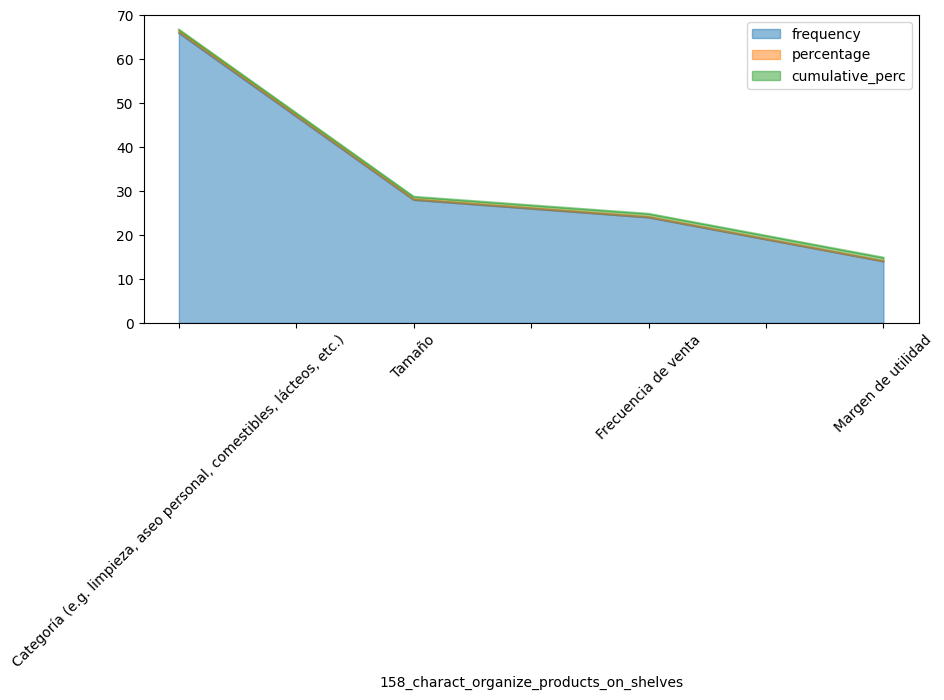

In [204]:
#Realizamos grafico de área del dataframe filtrado
Filtro18_index.plot(kind='area', figsize=(10,4),alpha = 0.5)
plt.xticks(rotation=45)

### **Columna "279_changes_procurement_pandemic"**

In [205]:
#Obtengo un análisis univariado de una variable categórica en específico
table19= freq_tbl(Micro_Retailer['279_changes_procurement_pandemic'])
table19

,279_changes_procurement_pandemic,frequency,percentage,cumulative_perc
0,Disminuir la cantidad del pedido,51,0.298246,0.298246
1,Disminuir la frecuencia de pedidos,30,0.175439,0.473684
2,"Disminución de la variedad de productos,Dismin...",26,0.152047,0.625731
3,"Disminuir la cantidad del pedido,Disminuir la ...",19,0.111111,0.736842
4,Ninguna de las anteriores,18,0.105263,0.842105
5,Aumentar la cantidad del pedido,16,0.093567,0.935673
6,"Aumentar la variedad de productos.,Disminuir l...",6,0.035088,0.970760
7,Aumentar la variedad de productos.,3,0.017544,0.988304
8,"Aumentar la cantidad del pedido,Disminución de...",2,0.011696,1.000000


In [206]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro19 = table19[table19['frequency']>20]
Filtro19

,279_changes_procurement_pandemic,frequency,percentage,cumulative_perc
0,Disminuir la cantidad del pedido,51,0.298246,0.298246
1,Disminuir la frecuencia de pedidos,30,0.175439,0.473684
2,"Disminución de la variedad de productos,Dismin...",26,0.152047,0.625731


In [207]:
#Ajusto el indice de mi dataframe
Filtro19_index= Filtro19.set_index('279_changes_procurement_pandemic')
Filtro19_index

,frequency,percentage,cumulative_perc
279_changes_procurement_pandemic,,,
Disminuir la cantidad del pedido,51,0.298246,0.298246
Disminuir la frecuencia de pedidos,30,0.175439,0.473684
"Disminución de la variedad de productos,Disminuir la cantidad del pedido,Disminuir la frecuencia de pedidos",26,0.152047,0.625731


<Axes: ylabel='frequency'>

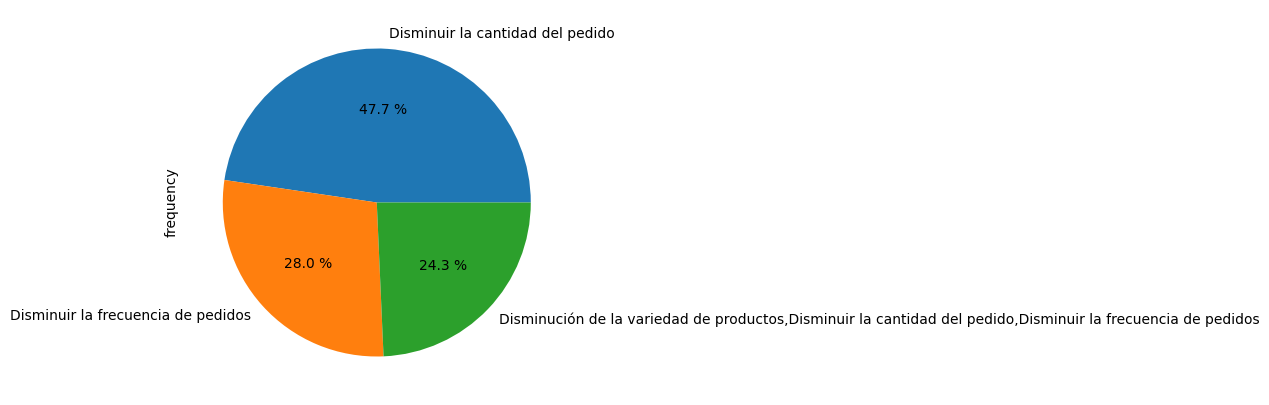

In [208]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro19_index["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")

### **Columna "249_technology_training"**

In [209]:
#Obtengo un análisis univariado de una variable categórica en específico
table20= freq_tbl(Micro_Retailer['249_technology_training'])
table20

,249_technology_training,frequency,percentage,cumulative_perc
0,Totalmente de acuerdo,79,0.461988,0.461988
1,De acuerdo,62,0.362573,0.824561
2,Ni de acuerdo ni en desacuerdo,19,0.111111,0.935673
3,Totalmente en desacuerdo,10,0.058480,0.994152
4,En desacuerdo,1,0.005848,1.000000


In [210]:
#Ajusto el indice de mi dataframe
Filtro20_index= table20.set_index('249_technology_training')
Filtro20_index

,frequency,percentage,cumulative_perc
249_technology_training,,,
Totalmente de acuerdo,79,0.461988,0.461988
De acuerdo,62,0.362573,0.824561
Ni de acuerdo ni en desacuerdo,19,0.111111,0.935673
Totalmente en desacuerdo,10,0.058480,0.994152
En desacuerdo,1,0.005848,1.000000


Text(0, 0.5, 'Frecuencia')

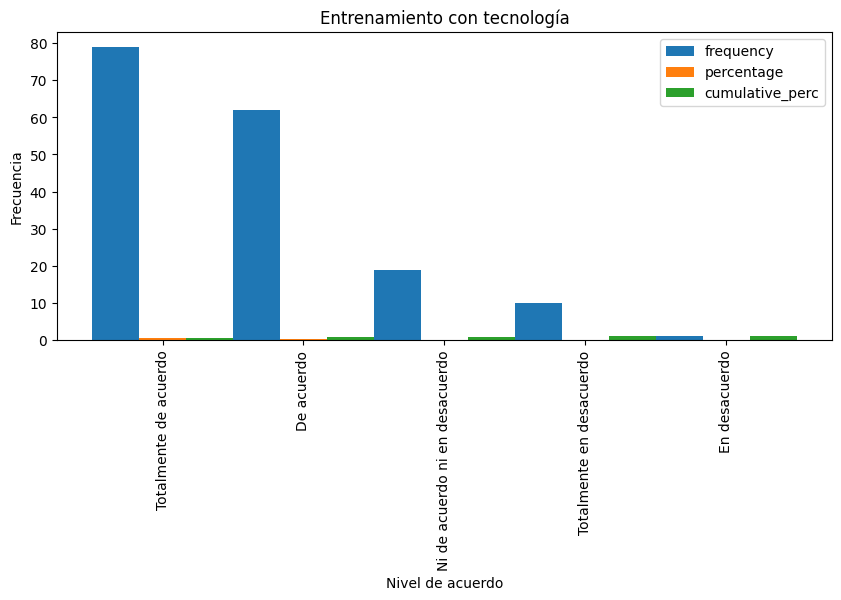

In [211]:
#Realizamos grafico de barras del dataframe filtrado
Filtro20_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Entrenamiento con tecnología')
plt.xlabel('Nivel de acuerdo')
plt.ylabel('Frecuencia')